<a href="https://colab.research.google.com/github/Rivalll-09/SIG/blob/main/UAS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import geopandas as gpd
from geopandas import datasets, read_file, geodataframe
import matplotlib.pyplot as plt

In [ ]:
filename = "Langsa.geojson"
file = open(filename)
kota = gpd.read_file(file)


<Axes: >

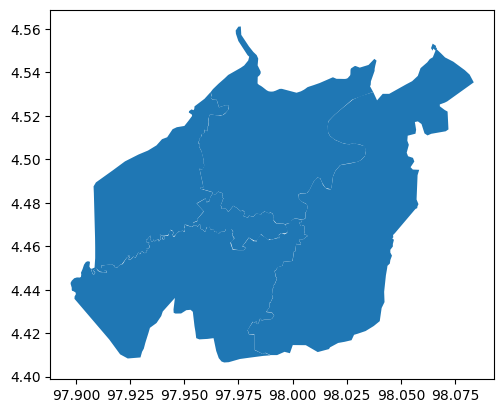

In [ ]:
kota.plot()

In [ ]:
kota.head()

,KDPPUM,NAMOBJ,REMARK,KDPBPS,FCODE,LUASWH,UUPP,SRS_ID,LCODE,METADATA,...,WADMKC,WIADKC,WADMKK,WIADKK,WADMPR,WIADPR,TIAPDM,SHAPE_Leng,SHAPE_Area,geometry
0,null,Langsa Lama,Wilayah Administrasi Kecamatan,null,null,0,null,null,0090,null,...,null,null,Langsa,null,Aceh,null,0,,,"POLYGON ((98.00403 4.47221, 98.00088 4.47282, ..."
1,null,Langsa Kota,Wilayah Administrasi Kecamatan,null,null,0,null,null,0090,null,...,null,null,Langsa,null,Aceh,null,0,,,"POLYGON ((97.99646 4.47009, 97.99582 4.47026, ..."
2,null,Langsa Baro,Wilayah Administrasi Kecamatan,null,null,0,null,null,0090,null,...,null,null,langsa,null,Aceh,null,0,,,"POLYGON ((97.95904 4.49792, 97.95903 4.49949, ..."
3,null,Langsa Barat,Wilayah Administrasi Kecamatan,null,null,0,null,null,0090,null,...,null,null,Langsa,null,Aceh,null,0,,,"POLYGON ((98.02904 4.54297, 98.02856 4.54286, ..."
4,null,Langsa Timur,Wilayah Administrasi Kecamatan,null,null,0,null,null,0090,null,...,null,null,Langsa,null,Aceh,null,0,,,"POLYGON ((98.03723 4.53100, 98.03700 4.53090, ..."


<Axes: >

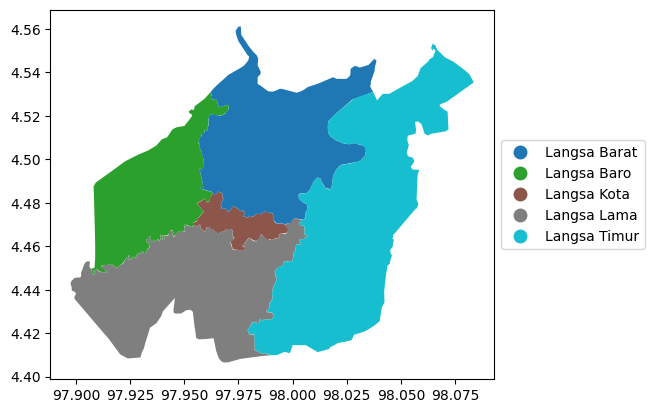

In [ ]:
kota.plot(column='NAMOBJ', legend=True,
           legend_kwds={"loc": "center left", "bbox_to_anchor": (1, 0.5)})

In [ ]:
import pandas as pd
ahli=pd.read_excel('langsa.xlsx')
ahli.head()

,NAMOBJ,KEAHLIAN_IT
0,Langsa Lama,200
1,Langsa Kota,110
2,Langsa Baru,300
3,Langsa Barat,250
4,Langsa Timur,100


In [ ]:
kota1=kota.merge(ahli, on='NAMOBJ')
kota1.head()

,KDPPUM,NAMOBJ,REMARK,KDPBPS,FCODE,LUASWH,UUPP,SRS_ID,LCODE,METADATA,...,WIADKC,WADMKK,WIADKK,WADMPR,WIADPR,TIAPDM,SHAPE_Leng,SHAPE_Area,geometry,KEAHLIAN_IT
0,null,Langsa Lama,Wilayah Administrasi Kecamatan,null,null,0,null,null,0090,null,...,null,Langsa,null,Aceh,null,0,,,"POLYGON ((98.00403 4.47221, 98.00088 4.47282, ...",200
1,null,Langsa Kota,Wilayah Administrasi Kecamatan,null,null,0,null,null,0090,null,...,null,Langsa,null,Aceh,null,0,,,"POLYGON ((97.99646 4.47009, 97.99582 4.47026, ...",110
2,null,Langsa Barat,Wilayah Administrasi Kecamatan,null,null,0,null,null,0090,null,...,null,Langsa,null,Aceh,null,0,,,"POLYGON ((98.02904 4.54297, 98.02856 4.54286, ...",250
3,null,Langsa Timur,Wilayah Administrasi Kecamatan,null,null,0,null,null,0090,null,...,null,Langsa,null,Aceh,null,0,,,"POLYGON ((98.03723 4.53100, 98.03700 4.53090, ...",100


<Axes: >

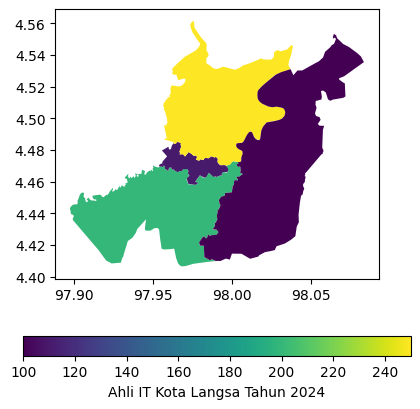

In [ ]:
kota1.plot(column='KEAHLIAN_IT', legend=True,figsize=(5,5),
            legend_kwds={"label": "Ahli IT Kota Langsa Tahun 2024", "orientation": "horizontal"})

In [ ]:
#-- Merubah data gizi menjadi dictionary --
kota1=ahli.to_dict()

In [ ]:
kota1

{'NAMOBJ': {0: 'Langsa Lama',
  1: 'Langsa Kota',
  2: 'Langsa Baru',
  3: 'Langsa Barat',
  4: 'Langsa Timur'},
 'KEAHLIAN_IT': {0: 200, 1: 110, 2: 300, 3: 250, 4: 100}}

In [ ]:
for i in kota1['KEAHLIAN_IT'].values():
  print(i)

200
110
300
250
100


In [ ]:
status=[]
for i in kota1['KEAHLIAN_IT'].values():
  if i>50 and i<101:
    status.append('Sangat Kurang')
  elif i>102 and i<150:
    status.append('Kurang')
  elif i>151 and i<201:
    status.append('Cukup')
  elif i>=202:
    status.append('Baik')
  else:
    status.append('Sangat Baik')

In [ ]:
status

['Sangat Baik', 'Sangat Baik', 'Baik', 'Baik', 'Sangat Baik']

In [ ]:
Aahli=gpd.GeoDataFrame(kota1)


In [ ]:
Aahli

,NAMOBJ,KEAHLIAN_IT
0,Langsa Lama,200
1,Langsa Kota,110
2,Langsa Baru,300
3,Langsa Barat,250
4,Langsa Timur,100


In [ ]:
Aahli['status']=status

In [ ]:
Aahli

,NAMOBJ,KEAHLIAN_IT,status
0,Langsa Lama,200,Cukup
1,Langsa Kota,110,Kurang
2,Langsa Baru,300,Baik
3,Langsa Barat,250,Baik
4,Langsa Timur,100,Sangat Kurang


In [ ]:
kota2=kota.merge(Aahli,on='NAMOBJ')

<Axes: >

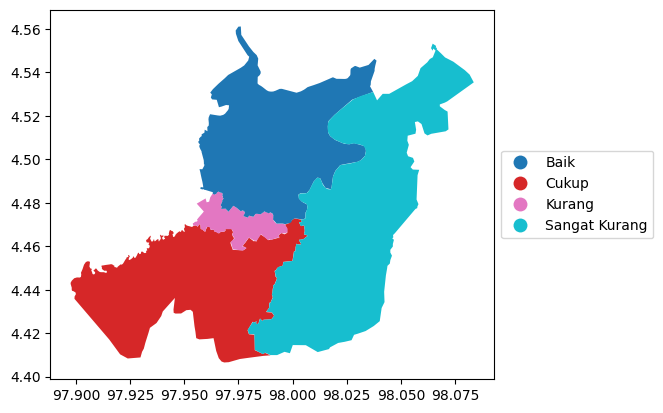

In [ ]:
kota2.plot(column='status', legend=True,
            legend_kwds={"loc": "center left", "bbox_to_anchor": (1, 0.5)})

In [ ]:
kota2.to_file('status.shp')

<ipython-input-58-4ee2f4f8b3ff>:1: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  kota2.to_file('status.shp')
